## **Phoebe General Concepts**

General Jupyter notebook file for getting used to Phoebe's functions. The documents can be access at https://phoebe-project.org/docs/2.4/. This roughly follows the tutorial there.

### Importing Phoebe

In [ ]:
# !pip install phoebe 
import phoebe as phb

### Logger

Good habit to initialize a logger for events. The different events are:
- `DEBUG`
- `INFO`
- `WARNING`
- `ERROR`
- `CRITICAL`

The logger is accessed via `phb.logger`. It can either:
1. Print an event to the command line (**clevel**).
2. Print an event to a specified file (**flevel**).

Default behaviour is `phb.logger(clevel='WARNING')`.


In [2]:
logger = phb.logger()

### Creating a binary system

Need to create a variable that will contain the binary system. For now, will use `phb.default_binary`, which will provide a detached binary system. However, it can be modified slightly with certain parameters.

In [ ]:
bSystem = phb.default_binary() # Loads the default binary bundle

Then constraints to the system are applied. A more in-depth explaination is in the `constrains.ipynb` file on how to search parameters and set them.

Parameters are set using the `bSystem.set_value` function.

In [ ]:
bSystem.set_value(
    qualifier='teff', # The effective temperature...
    component='primary', # ...of the primary star...
    value=6500 # ...is set to 6500 K.
)

Next is to define the dataset using `bSystem.add_dataset`. A more in-depth explaination is in the `datasets.ipynb` file.

Datasets stores observations to compare the model to, and tells PHOEBE at what times to integrate the model and store passband-dependent options.

In [ ]:
bSystem.add_dataset(
    kind='lc', # Kind of dataset to be generated. 'lc' here means light curve.
    compute_times=phb.linspace(0, 1, 101) # Generate 100 points in time from 0 - 1 (in days).
)

<ParameterSet: 80 parameters | contexts: dataset, constraint, figure, compute>

Finally, it is time to run the model using `bSystem.run_compute`.

In [ ]:
bSystem.run_compute() # Simulate

100%|██████████| 101/101 [00:00<00:00, 135.02it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

### Accessing and Viewing Data

Any parameter can be accessed from the binary, including the model just generated. 

Data can be fetched using `bSystem.get_value`.
Exporting data can be done using `bSystem.export_arrays`.

In [ ]:
print(bSystem.get_value(qualifier='fluxes', context='model')) # Gets the flux of the model over time

[0.69273328 0.86432306 1.07744179 1.28831888 1.47384436 1.61439936
 1.68785017 1.69162448 1.69231875 1.69390462 1.69520725 1.69666012
 1.69807696 1.69957494 1.70096241 1.702511   1.70374624 1.7051907
 1.70646621 1.70765796 1.70865538 1.70947673 1.71015135 1.71079321
 1.71138634 1.71107379 1.71151595 1.71135701 1.71106855 1.71059461
 1.70999686 1.70915558 1.70849103 1.70729121 1.70638862 1.70546752
 1.70417081 1.70280905 1.70182237 1.70059583 1.69947278 1.69837645
 1.69718504 1.69633455 1.69383379 1.64169057 1.54089117 1.4071697
 1.25561609 1.10356387 0.98348227 1.10357615 1.2556626  1.40734769
 1.54097794 1.64179519 1.69377224 1.69655469 1.69704166 1.69836456
 1.69941101 1.7005961  1.70174117 1.70295238 1.7040497  1.7052959
 1.70624123 1.70739475 1.70837326 1.70928733 1.71000201 1.71055693
 1.7109371  1.71131927 1.71165539 1.71107361 1.71125234 1.71084306
 1.71028919 1.70954513 1.70867058 1.70756171 1.70659796 1.70512607
 1.70391615 1.70271189 1.70111826 1.69946757 1.6981858  1.6966818

Data can be plotted using the inbuilt plot function, called using `bSystem.plot`, which is explained further in the `plotting.ipynb` file.

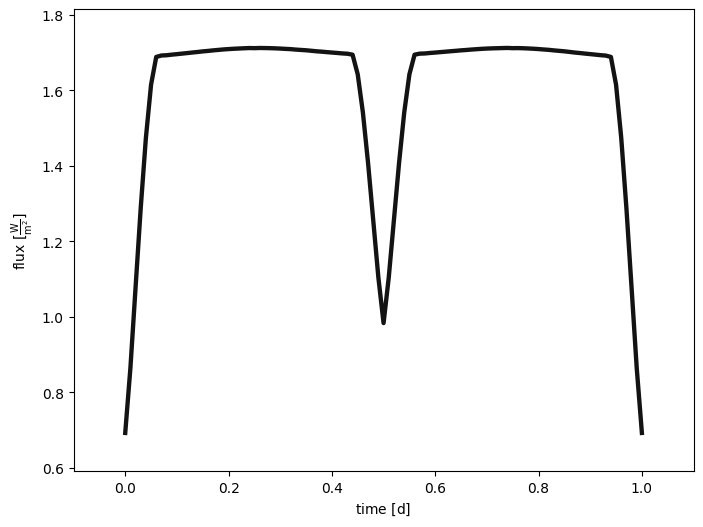

In [21]:
afig, mpltfig = bSystem.plot(show=True)

## Default Binary Bundle

### Parameters

`phb.default_binary` generates a Bundle, which contains different parameters that can be accessed and changed. The default binary Bundle contains over 100 parameters.

A Bundle contains tags that can be used as a filter to access the correct parameters. This can be done using `bSystem.filter`, which returns a ParameterSet that contains the parameters related to the filter used.

In [ ]:
bSystem = phb.default_binary()

bSystem.filter(context='compute') # Gets all parameters needed for computing a model

['system', 'component', 'constraint', 'compute', 'figure', 'setting']

To get all the tags, use `bSystem.contexts`. This can help to filter things further.

To get the parameter itself, you use `bSystem.qualifier` to access it. You can do `bSystem.qualifiers` to display all the parameters within a filter.



In [24]:
bSystem.filter(context='compute').filter(component='primary').qualifiers # All the parameters for the primary star

['mesh_method', 'ntriangles', 'distortion_method', 'atm']

Then you can use `bSystem.get_parameter` to get the parameter itself after filtering, or include it into the function itself as a shortcut. You can then use `bSystem.get_value` to retrieve the actual value of the parameter.

Parameters typically have limits, which can be checked using `bSystem.get_limits` and `bSystem.get_choices`.

In [26]:
bSystem.get_parameter(
    context='compute',
    component='primary',
    qualifier='ntriangles'
).get_value()

1500

### Twigs

Parameters can also be accessed using twigs, which works like indexing a list. You need to use `@` to search through different filters. It also will access the parameter itself once you filter to one, so you don't need to use the `bSystem.qualifier` function. 

In [ ]:
bSystem['compute@primary@ntriangles'] # Same as the previous function above, but using twigs

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

It also allows for easy reading and setting the value of the parameter.

In [34]:
print(bSystem['distortion_method@primary@compute']) # Reading the parameter

print(bSystem['distortion_method@primary@compute'].get_choices()) # Gets the valid choices of the parameter
print('')
bSystem['distortion_method@primary@compute'] = 'sphere' # Changing the parameter
print(bSystem['distortion_method@primary@compute'])

Parameter: distortion_method@primary@phoebe01@compute
                       Qualifier: distortion_method
                     Description: Method to use for distorting stars
                           Value: sphere
                         Choices: roche, rotstar, sphere, none
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: mesh_method:marching,hierarchy.is_meshable:true

['roche', 'rotstar', 'sphere', 'none']

Parameter: distortion_method@primary@phoebe01@compute
                       Qualifier: distortion_method
                     Description: Method to use for distorting stars
                           Value: sphere
                         Choices: roche, rotstar, sphere, none
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: mesh_method:marching,hierarchy.is_meshable:true



## Saving and Loading Bundles

### Saving

You can use the `bSystem.save` function to save a Bundle to a JSON file. This will display all of the parameters in plain-text, which can be editted, although its probably better to edit it in Python.

In [36]:
bSystem = phb.default_binary() # Generate the default bundle
bSystem['incl@orbit'] = 12.345 # Set the inclination of the orbit
bSystem.save('GeneralConcepts.phoebe') # Save the bundle to 'GeneralConcept.phoebe' in the same directory

'GeneralConcepts.phoebe'

### Loading

To load a bundle from its JSON file, use `phb.Bundle.open` and input the file path.

In [ ]:
bSystem2 = phb.Bundle.open('GeneralConcepts.phoebe') # Load the bundle
print(bSystem2['incl@orbit'].get_value())

12.345
